<a href="https://colab.research.google.com/github/ardabyr/DataScience/blob/main/%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
files.upload()

# Загрузка набора данных
# Чтение данных
data = pd.read_csv('diamonds.csv')

Saving diamonds.csv to diamonds (2).csv


In [ ]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# Количественные признаки и их характеристики
# mean - среднее значение, count - количество, std - стандратное отклонение
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
# Категориальные признаки
# unique - количество уникальных признаков, top - самый попyлярный признак, freq - количество самого популярного признака
data.describe(include=['object'])

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In [ ]:
# Проверка наличия пропусков в данных
# data.isnull() выведет таблицу со значениями True на местах, где стоит null
# Так как True равнозначно единице, то все эти значения можно сложить и получить количество null значений
data.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

Пропуски отсутствуют

In [ ]:
duplicates = data[data.duplicated]

In [ ]:
duplicates

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z


Дубликатов нет


<Axes: >

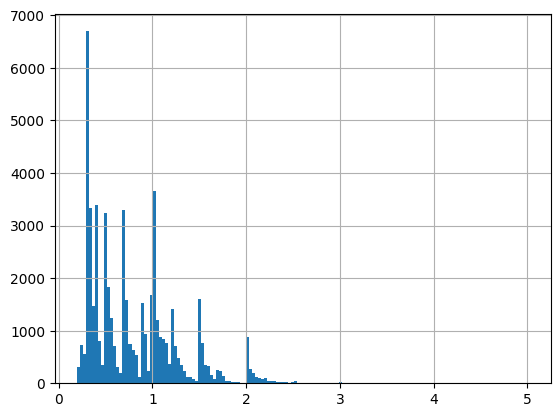

In [ ]:
data['carat'].hist(bins=150)

<Axes: >

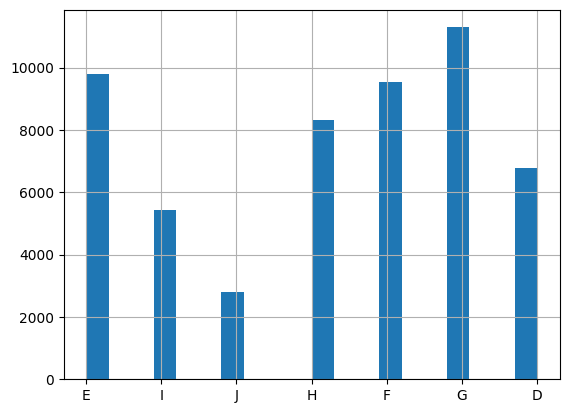

In [ ]:
data["color"].hist(bins=20)

In [ ]:
# Поиск и удаление выбросов/аномалий через межквартильный размах, например, для признака 'depth'
Q1 = data['depth'].quantile(0.25)
Q1

61.0

In [ ]:
Q3 = data['depth'].quantile(0.75)
Q3

62.5

<Axes: >

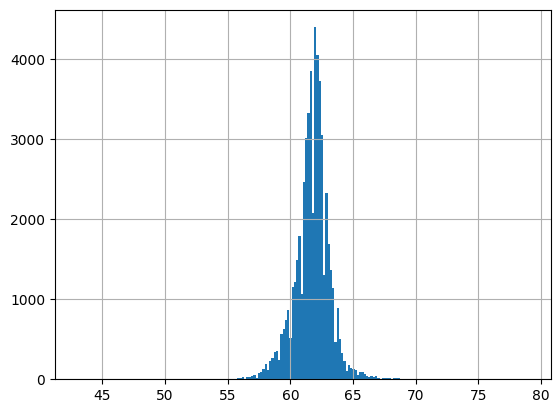

In [ ]:
data["depth"].hist(bins=200)

In [ ]:
# Создаем новый столбец чистых данных
IQR = Q3 - Q1
outliers_removed = data[(data['depth'] >= Q1-1.5*IQR) & (data['depth'] <= Q3+1.5*IQR)]
outliers_removed

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
df_encoded = pd.get_dummies(outliers_removed, columns=['cut', 'color', 'clarity'])

In [ ]:
df_encoded

,Unnamed: 0,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,...,False,False,False,False,False,True,False,False,False,False
1,2,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,...,False,False,False,False,True,False,False,False,False,False
3,4,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,...,True,False,False,False,False,False,False,True,False,False
4,5,0.31,63.3,58.0,335,4.34,4.35,2.75,False,True,...,False,True,False,False,False,True,False,False,False,False
5,6,0.24,62.8,57.0,336,3.94,3.96,2.48,False,False,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,60.8,57.0,2757,5.75,5.76,3.50,False,False,...,False,False,False,False,True,False,False,False,False,False
53936,53937,0.72,63.1,55.0,2757,5.69,5.75,3.61,False,True,...,False,False,False,False,True,False,False,False,False,False
53937,53938,0.70,62.8,60.0,2757,5.66,5.68,3.56,False,False,...,False,False,False,False,True,False,False,False,False,False
53938,53939,0.86,61.0,58.0,2757,6.15,6.12,3.74,False,False,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
# Определяем список категориальных столбцов на основе типа данных 'object' (строковых значений)
categorical_columns = outliers_removed.select_dtypes(include=['object']).columns

# Удаляем категориальные признаки из DataFrame
data_without_categorical = outliers_removed.drop(categorical_columns, axis=1)

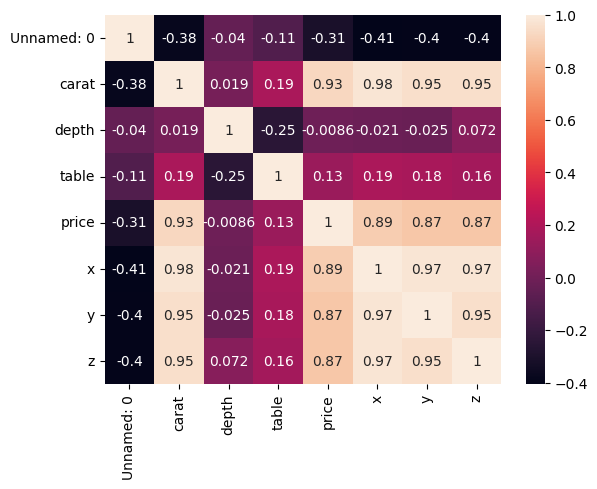

In [ ]:
# Корреляционная матрица и тепловая карта
corr = data_without_categorical.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
# Нормализация признаков
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_without_categorical)
df_scaled = pd.DataFrame(scaled_features)
df_scaled

,0,1,2,3,4,5,6,7
0,-1.751361,-1.188678,-0.247488,-1.106810,-0.896792,-1.569323,-1.516223,-1.556403
1,-1.751296,-1.231291,-1.769809,1.716146,-0.896792,-1.622964,-1.638886,-1.726970
2,-1.751167,-1.060839,0.558447,0.304668,-0.894786,-1.345820,-1.297183,-1.272125
3,-1.751102,-1.018226,1.364382,0.304668,-0.894535,-1.220659,-1.192043,-1.101558
4,-1.751038,-1.167371,0.916640,-0.165824,-0.894284,-1.578263,-1.533746,-1.485333
...,...,...,...,...,...,...,...,...
51390,1.735474,-0.144661,-0.874326,-0.165824,-0.287093,0.039896,0.043345,-0.035514
51391,1.735539,-0.144661,1.185285,-1.106810,-0.287093,-0.013745,0.034583,0.120839
51392,1.735604,-0.187274,0.916640,1.245653,-0.287093,-0.040565,-0.026748,0.049769
51393,1.735668,0.153630,-0.695229,0.304668,-0.287093,0.397500,0.358763,0.305620


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


# Стандартизованные данные df_scaled используем при обучении, исключая категроиальные признаки
X = df_scaled.drop(4, axis=1)
y = df_scaled[4]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)

R2 Score: 0.8616147123419274
Mean Squared Error: 0.14065823223447416


<Axes: xlabel='1', ylabel='4'>

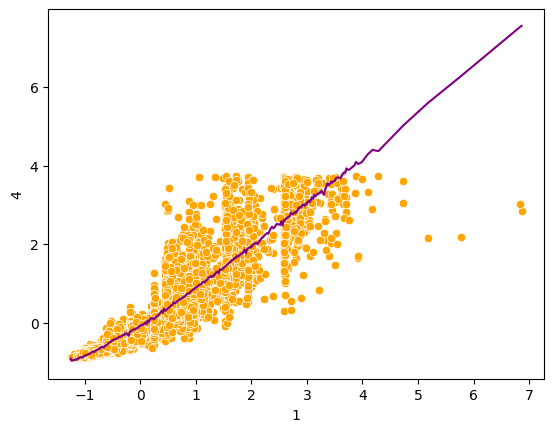

In [ ]:
sns.scatterplot(x=X_test[1], y=y_test, color='orange')
sns.lineplot(x=X_test[1], y=y_pred, color='purple')

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly = PolynomialFeatures(degree=2)
model = make_pipeline(poly, LinearRegression())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2_poly = r2_score(y_test, y_pred)
mse_poly = mean_squared_error(y_test, y_pred)

print("R2 Score (Polynomial Regression):", r2_poly)
print("Mean Squared Error (Polynomial Regression):", mse_poly)

R2 Score (Polynomial Regression): 0.37754209740179856
Mean Squared Error (Polynomial Regression): 0.6326816217354891


<Axes: xlabel='1', ylabel='4'>

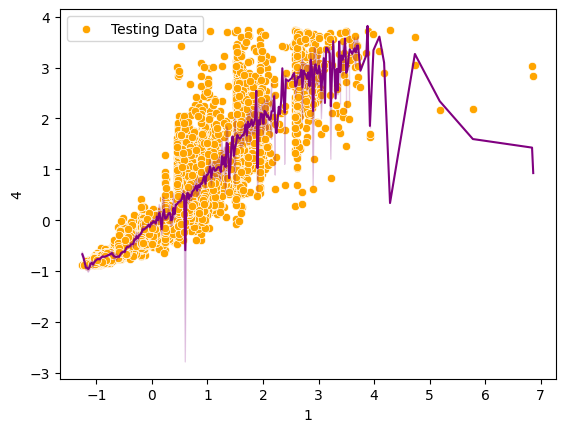

In [ ]:
sns.scatterplot(x=X_test[1], y=y_test, color='orange', label='Testing Data')
sns.lineplot(x=X_test[1], y=y_pred, color='purple')

In [ ]:
X_drop = data.drop(["cut", "color", "clarity"], axis=1)

X_train_drop, X_test_drop, y_train, y_test = train_test_split(X_drop, y, test_size=0.2)

model_drop = LinearRegression()
model_drop.fit(X_train_drop, y_train)


y_pred_drop = model_drop.predict(X_test_drop)


r2_drop = r2_score(y_test, y_pred_drop)
mse_drop = mean_squared_error(y_test, y_pred_drop)

print("R2 Score (Without Categorical Features):", r2_drop)
print("Mean Squared Error (Without Categorical Features):", mse_drop)

R2 Score (Without Categorical Features): 1.0
Mean Squared Error (Without Categorical Features): 4.581358533963362e-24


4.581358533963362e-24 - это очень маленькое число, почти что 0

In [ ]:
from sklearn.preprocessing import OneHotEncoder


X_encoded = pd.get_dummies(data, columns=["cut", "color", "clarity"])


X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2)


model_encoded = LinearRegression()
model_encoded.fit(X_train_encoded, y_train)


y_pred_encoded = model_encoded.predict(X_test_encoded)


r2_encoded = r2_score(y_test, y_pred_encoded)
mse_encoded = mean_squared_error(y_test, y_pred_encoded)

print("R2 Score (OneHotEncoded Features):", r2_encoded)
print("Mean Squared Error (OneHotEncoded Features):", mse_encoded)


R2 Score (OneHotEncoded Features): 1.0
Mean Squared Error (OneHotEncoded Features): 5.804711123209751e-24


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

X_cat = df_scaled[[1, 2, 3]]

X_cat_encoded = encoder.fit_transform(X_cat)

X_encoded_sklearn = X.copy()
X_encoded_sklearn[[1, 2, 3]] = X_cat_encoded

X_train_sklearn, X_test_sklearn, y_train, y_test = train_test_split(X_encoded_sklearn, y, test_size=0.2)


model_sklearn = LinearRegression()
model_sklearn.fit(X_train_sklearn, y_train)


y_pred_sklearn = model_sklearn.predict(X_test_sklearn)


r2_sklearn = r2_score(y_test, y_pred_sklearn)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)

print("R2 Score (Ordinal Encoded Features using scikit-learn):", r2_sklearn)
print("Mean Squared Error (Ordinal Encoded Features using scikit-learn):", mse_sklearn)


R2 Score (Ordinal Encoded Features using scikit-learn): 0.8528720841392571
Mean Squared Error (Ordinal Encoded Features using scikit-learn): 0.14889778937573553


In [ ]:
from sklearn.svm import SVR


model_svr = SVR()
model_svr.fit(X_train, y_train)


y_pred_svr = model_svr.predict(X_test)


r2_svr = r2_score(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)

print("R2 Score (Support Vector Regression):", r2_svr)
print("Mean Squared Error (Support Vector Regression):", mse_svr)


R2 Score (Support Vector Regression): -0.14221489043793212
Mean Squared Error (Support Vector Regression): 1.1559551508853767
